In [132]:
import pandas as pd

data_row=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/0518(final)/train/train_data_after_vector(0521).csv",index_col=0)

data_row

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,predict
169,0.361232,0.274435,-0.605550,0.064531,-1.104946,-0.013144,1.337692,0.814906,0.196035,-1.263118,...,-0.575228,0.753313,-0.053280,-0.974474,1.138856,0.731361,0.789483,-0.550535,0.504425,0
1139,0.360683,0.361684,-0.883851,0.356234,-1.065911,-0.318026,-1.011139,1.389155,-0.431204,-0.937028,...,1.126606,0.473501,0.859134,-0.681417,-0.312455,1.409282,0.525957,-0.704719,0.574171,0
6943,-0.125114,-1.326654,-0.912476,1.477165,0.973293,0.095143,-0.076307,-0.902706,0.766408,0.017840,...,0.825718,0.568926,0.093562,-0.407154,0.158892,0.789388,-0.406644,-0.371516,0.639310,0
8865,0.588050,0.287364,-0.408667,0.208657,-0.583474,-0.425142,-0.088826,0.130081,-1.145723,-0.331164,...,2.204973,0.228713,-0.602468,-0.334736,-0.162464,0.532971,-0.903026,-1.273159,1.271828,0
10061,0.607152,1.172856,0.389593,0.680254,-1.325027,0.531277,0.416406,0.695203,0.085631,-1.509167,...,0.407197,-0.292087,-0.072680,-0.130538,1.007719,0.554593,-0.670809,-0.394230,0.744300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10115,0.548940,0.078676,-0.327682,0.975424,-0.379027,-0.188191,-0.228366,1.096691,-0.414529,0.570428,...,0.304363,0.598999,1.020585,-0.539426,-0.622473,1.586265,-0.499777,0.072785,0.485814,2
3427,0.237063,0.302642,-0.143665,0.230275,-0.532616,-0.472323,0.697929,0.947824,0.563267,-0.266007,...,0.104771,1.243418,1.467028,0.596827,0.067420,0.076348,0.051309,0.006291,0.198555,2
7059,-0.371433,-1.795938,0.409936,1.068432,1.027761,-0.149095,-0.231309,0.055548,-0.183250,-0.330952,...,1.075910,0.397395,0.031469,0.483614,0.201096,1.664359,-0.385942,1.282165,0.819644,0
6140,0.117727,0.278393,-0.108816,-0.358752,-0.394477,-0.478670,0.015375,-0.189932,0.116898,0.352769,...,0.431910,0.230636,1.541226,1.265123,-0.354604,0.482908,0.239857,-0.215869,0.806237,2


In [133]:

import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")
device = torch.device("mps")  # MPS 장치 사용

tensor([1.], device='mps:0')


In [134]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [135]:
# 데이터 불러오기 및 전처리
data_row = pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/0518(final)/train/train_data_after_vector(0521).csv", index_col=0)
y_train = pd.get_dummies(data_row['predict']).values
X_train = data_row.drop(columns=['predict']).values

test = pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/0518(final)/test/test_data_after_vector(0521).csv", index_col=0)
test_y = pd.get_dummies(test['predict']).values
test_x = test.drop(columns=['predict']).values

In [136]:
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")
device = torch.device("mps")  # MPS 장치 사용

tensor([1.], device='mps:0')


In [137]:

X_train = torch.tensor(X_train, dtype=torch.float).unsqueeze(1).to(device)
y_train = torch.tensor(y_train, dtype=torch.float).to(device)
test_x = torch.tensor(test_x, dtype=torch.float).unsqueeze(1).to(device)
test_y = torch.tensor(test_y, dtype=torch.float).to(device)

In [138]:
print(X_train.shape)
print(y_train.shape)
print(test_x.shape)
print(test_y.shape)

torch.Size([10245, 1, 768])
torch.Size([10245, 3])
torch.Size([299, 1, 768])
torch.Size([299, 3])


In [139]:

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=40, shuffle=True)

test_dataset = TensorDataset(test_x, test_y)
test_loader = DataLoader(test_dataset, shuffle=False)

In [140]:
class TextClassifier(nn.Module):
    def __init__(self):
        super(TextClassifier, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=X_train.shape[2], out_channels=128, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=64, kernel_size=1)
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=32, kernel_size=1)
        self.pool = nn.MaxPool1d(kernel_size=1)
        self.dropout = nn.Dropout(0.5)  
        self.lstm = nn.LSTM(input_size=32, hidden_size=128, num_layers=2, batch_first=True, bidirectional=True)
        self.fc1 = nn.Linear(128*2, 32)
        self.fc2 = nn.Linear(32, 3)
        self.activation = nn.ELU()
        self.bn1 = nn.BatchNorm1d(128)  
        self.bn2 = nn.BatchNorm1d(64)
        self.bn3 = nn.BatchNorm1d(32)

    def forward(self, x):
        x = self.bn1(self.activation(self.conv1(x)))
        x = self.bn2(self.activation(self.conv2(x)))
        x = self.bn3(self.activation(self.conv3(x)))
        x = self.pool(x)
        x = self.dropout(x)
        x = x.permute(0, 2, 1)  
        x, _ = self.lstm(x)
        x = self.dropout(x[:, -1, :])  
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


model = TextClassifier().to(device)
model.to(device)

TextClassifier(
  (conv1): Conv1d(768, 128, kernel_size=(1,), stride=(1,))
  (conv2): Conv1d(128, 64, kernel_size=(1,), stride=(1,))
  (conv3): Conv1d(64, 32, kernel_size=(1,), stride=(1,))
  (pool): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (lstm): LSTM(32, 128, num_layers=2, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=256, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=3, bias=True)
  (activation): ELU(alpha=1.0)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [141]:
from torch.optim.lr_scheduler import StepLR


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.003,weight_decay=1e-5)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

In [142]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

In [143]:
num_epochs = 200
training_losses = []
validation_losses = []


patience = 10
counter = 0  
best_loss = None  

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  
        inputs = inputs.permute(0, 2, 1)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, torch.max(labels, 1)[1])
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    avg_train_loss = train_loss / len(train_loader)
    training_losses.append(avg_train_loss)
    
   
    model.eval()
    validation_loss = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device) 
            inputs = inputs.permute(0, 2, 1)  
            outputs = model(inputs)
            loss = criterion(outputs, torch.max(labels, 1)[1])
            validation_loss += loss.item()
    
    avg_validation_loss = validation_loss / len(test_loader)
    validation_losses.append(avg_validation_loss)

    print(f'Epoch {epoch+1}, Training Loss: {avg_train_loss}, Validation Loss: {avg_validation_loss}')
    
    scheduler.step()
    
    if best_loss is None:
        best_loss = avg_validation_loss
    elif avg_validation_loss < best_loss:
        best_loss = avg_validation_loss
        counter = 0  
    else:
        counter += 1  
        if counter >= patience:  
            print("Early stopping!")
            break

print('Test Fine End')



Epoch 1, Training Loss: 0.2737978955709053, Validation Loss: 0.08697910707097772
Epoch 2, Training Loss: 0.11680642117706312, Validation Loss: 0.05686124992008676
Epoch 3, Training Loss: 0.08370183752815158, Validation Loss: 0.05205410845400575
Epoch 4, Training Loss: 0.07016764057085374, Validation Loss: 0.047224518622263234
Epoch 5, Training Loss: 0.06674399791337035, Validation Loss: 0.03535554029643126
Epoch 6, Training Loss: 0.06118396513507401, Validation Loss: 0.03855432903088075
Epoch 7, Training Loss: 0.04762097559996123, Validation Loss: 0.03195674470119482
Epoch 8, Training Loss: 0.03545921680753949, Validation Loss: 0.022236380049209865
Epoch 9, Training Loss: 0.031734131589615244, Validation Loss: 0.025235704871760373
Epoch 10, Training Loss: 0.03437245847609307, Validation Loss: 0.03684970258027602
Epoch 11, Training Loss: 0.01703371986355415, Validation Loss: 0.03385113522024278
Epoch 12, Training Loss: 0.010505958216802811, Validation Loss: 0.03158700288464315
Epoch 13,

In [144]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np



torch.save(model.state_dict(), 'voice phishing detection model(0521).pt')

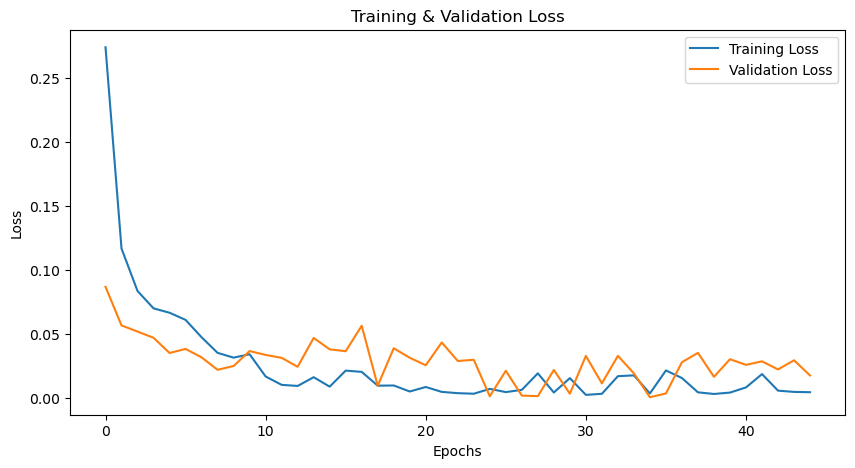

In [145]:
plt.figure(figsize=(10, 5))
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

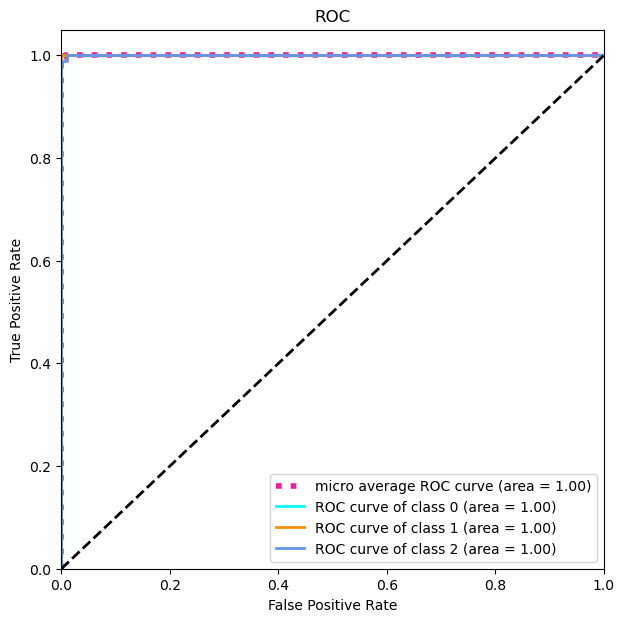

In [146]:

def plot_multiclass_roc_curve(test_y, y_score, n_classes):
   
    test_y_bin = label_binarize(test_y, classes=[*range(n_classes)])

    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(test_y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

   
    fpr["micro"], tpr["micro"], _ = roc_curve(test_y_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

   
    plt.figure(figsize=(7, 7))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()





from sklearn.preprocessing import label_binarize

test_x = test_x.permute(0, 2, 1) 
y_score = model(test_x).detach().cpu().numpy()

test_y = test_y.detach().cpu().numpy()

plot_multiclass_roc_curve(test_y, y_score, n_classes=3)

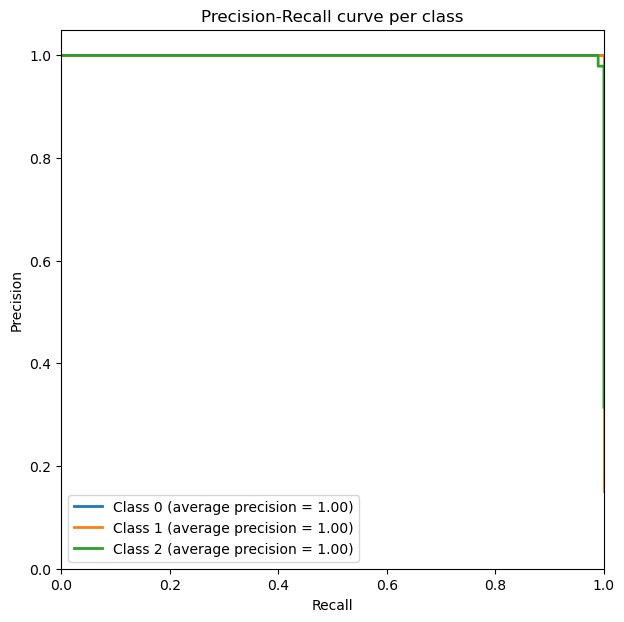

In [147]:
def plot_precision_recall_curve(test_y, y_score, n_classes):
    
    test_y = label_binarize(test_y, classes=[*range(n_classes)])
    
   
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(test_y[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(test_y[:, i], y_score[:, i])

    
    plt.figure(figsize=(7, 7))
    for i in range(n_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (average precision = {average_precision[i]:0.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve per class')
    plt.legend(loc="best")
    plt.show()
    
plot_precision_recall_curve(test_y, y_score, n_classes=3)

In [148]:

y_pred = np.argmax(y_score, axis=1)
test_y_labels = np.argmax(test_y, axis=1)  # 실제 레이블

In [149]:

accuracy = accuracy_score(test_y_labels, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9966555183946488


In [150]:
conf_matrix = confusion_matrix(test_y_labels, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[160   0   0]
 [  0  45   0]
 [  0   1  93]]


In [151]:
with open("CNN BILSTM confusion matrix.txt", "w") as text_file:
    print(confusion_matrix(test_y_labels, y_pred), file=text_file)

In [152]:
class_report = classification_report(test_y_labels, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       0.98      1.00      0.99        45
           2       1.00      0.99      0.99        94

    accuracy                           1.00       299
   macro avg       0.99      1.00      0.99       299
weighted avg       1.00      1.00      1.00       299



In [153]:
with open("CNN-BILSTM output.txt", "w") as text_file:
    print(classification_report(test_y_labels, y_pred,digits=4), file=text_file)